In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Customer-Churn-Records.csv")

df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
print("Dataset Shape:", df.shape)
df.info()
df.isnull().sum()


Dataset Shape: (10000, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 n

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

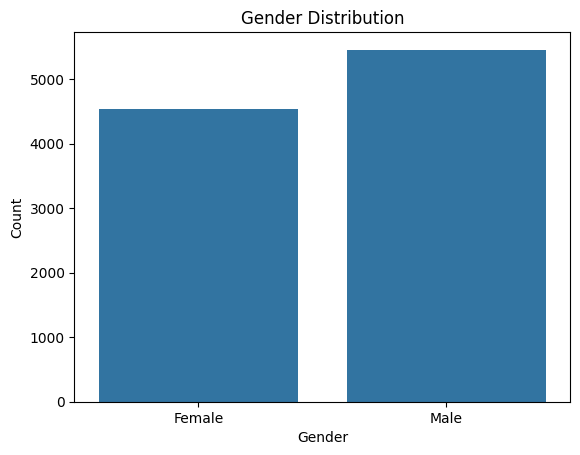

Gender
Male      5457
Female    4543
Name: count, dtype: int64


In [4]:
#univariate for Gender
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

print(df['Gender'].value_counts())


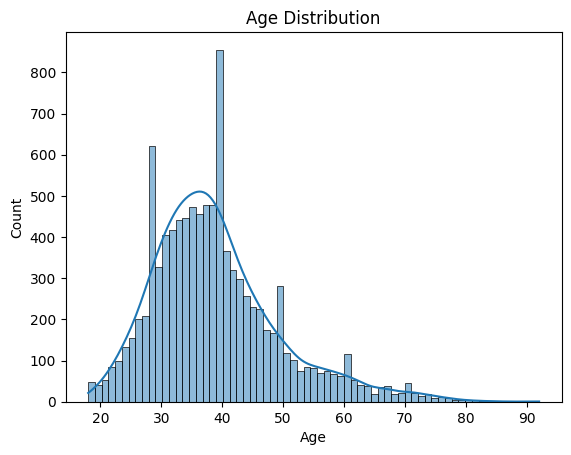

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


In [5]:
#univariate for Age
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

print(df['Age'].describe())


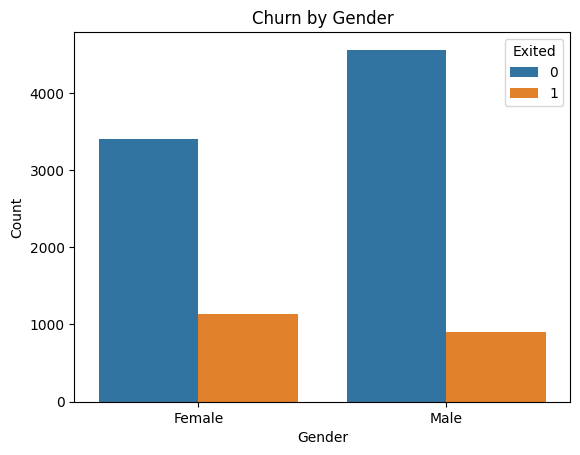

In [6]:
#bivariate for Churn and Gender
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title("Churn by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Exited")
plt.show()


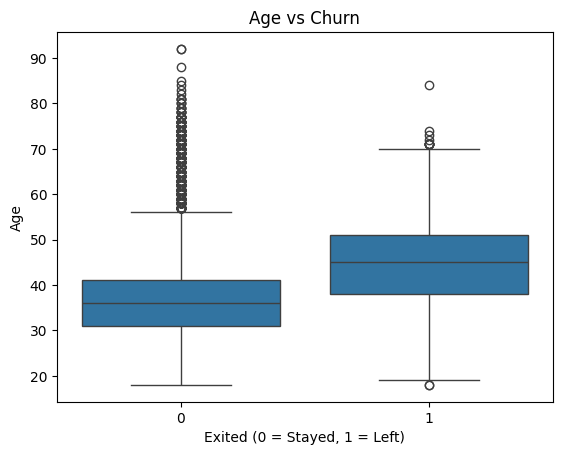

In [7]:
#bivariate for Churn and Age
sns.boxplot(x='Exited', y='Age', data=df)
plt.title("Age vs Churn")
plt.xlabel("Exited (0 = Stayed, 1 = Left)")
plt.ylabel("Age")
plt.show()


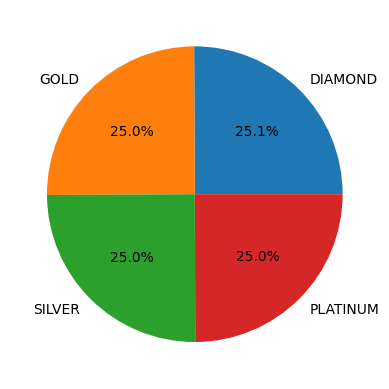

In [8]:
x = df['Card Type'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [10]:
Numerical_Variables=df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Point Earned']]
Categorical_Variables=df[['Geography','Gender','HasCrCard','IsActiveMember','Complain','Satisfaction Score','Card Type']]

In [11]:
def Numerical_Analysis(col):
    print('Univariable Analysis for Numerical Variable:', col.name)
    print('Mean:', col.mean())
    print('Median:', col.median())
    print('Mode:', col.mode().values)
    print('Standard Deviation:', col.std())
    print('Minimum:', col.min())
    print('Maximum:', col.max())
    print('25%:', col.quantile(0.25))
    print('50%:', col.quantile(0.50))
    print('75%:', col.quantile(0.75))
    print('Range:', col.max() - col.min())
    print('IQR:', col.quantile(0.75) - col.quantile(0.25))
    print('Variance:', col.var())
    print('COV:', (col.std() / col.mean()) * 100)
    print('Skewness:', col.skew())
    print('Null Check:', col.isnull().sum())

    #Capping outliers to 1st and 99th percentile instead of using q1 q3
    lower_limit = col.quantile(0.01)
    upper_limit = col.quantile(0.99)
    col_capped = col.clip(lower=lower_limit, upper=upper_limit)

    sns.histplot(col_capped, kde=True)
    plt.title(f'Distribution of {col.name} (Capped to 1st & 99th Percentile)')
    plt.xlabel(col.name)
    plt.ylabel('Count')
    plt.show()

    return col_capped


In [12]:
def Categorical_Analysis(col):
    print('Univariable Analysis for Categorical Variable: ',col.name)
    print('Count of Categories: ',col.value_counts())
    print('Percentage of each Category: ',col.value_counts(normalize=True) * 100)

    sns.countplot(x=col)
    plt.title(f"{col.name} Distribution")
    plt.xlabel(col.name)
    plt.ylabel("Count")
    plt.show()

In [13]:
#copy to store the new cleaned data
df_cleaned = df.copy()

Univariable Analysis for Numerical Variable: CreditScore
Mean: 650.5288
Median: 652.0
Mode: [850]
Standard Deviation: 96.65329873613035
Minimum: 350
Maximum: 850
25%: 584.0
50%: 652.0
75%: 718.0
Range: 500
IQR: 134.0
Variance: 9341.860156575658
COV: 14.857650996563157
Skewness: -0.07160660820092675
Null Check: 0


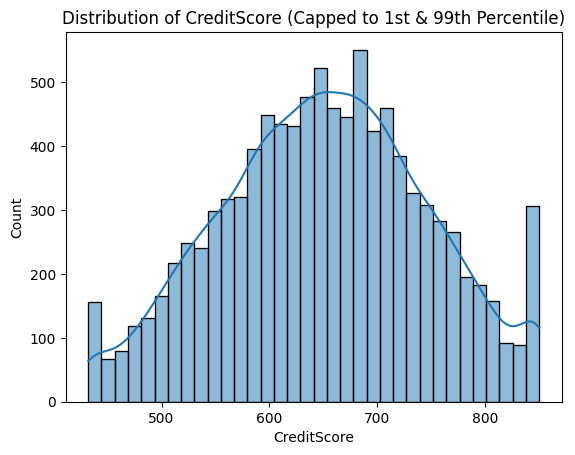

Univariable Analysis for Numerical Variable: Age
Mean: 38.9218
Median: 37.0
Mode: [37]
Standard Deviation: 10.487806451704609
Minimum: 18
Maximum: 92
25%: 32.0
50%: 37.0
75%: 44.0
Range: 74
IQR: 12.0
Variance: 109.99408416841683
COV: 26.945841280990624
Skewness: 1.0113202630234552
Null Check: 0


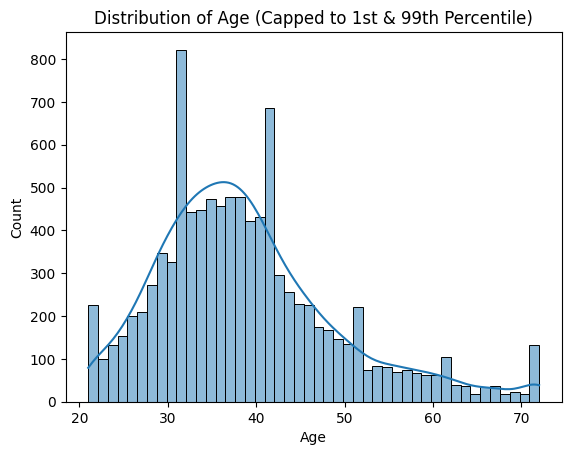

Univariable Analysis for Numerical Variable: Tenure
Mean: 5.0128
Median: 5.0
Mode: [2]
Standard Deviation: 2.8921743770496837
Minimum: 0
Maximum: 10
25%: 3.0
50%: 5.0
75%: 7.0
Range: 10
IQR: 4.0
Variance: 8.364672627262726
COV: 57.695786327994
Skewness: 0.01099145797717904
Null Check: 0


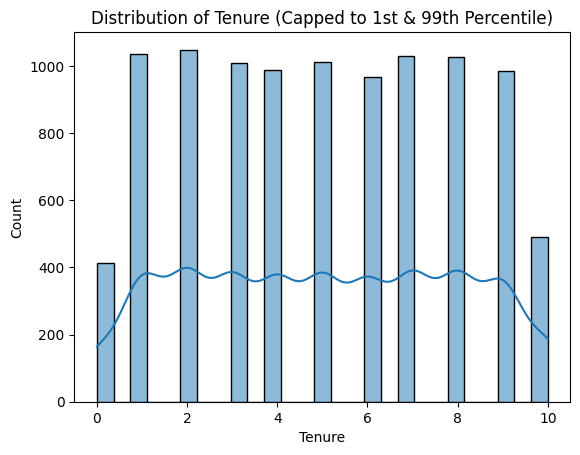

Univariable Analysis for Numerical Variable: Balance
Mean: 76485.889288
Median: 97198.54000000001
Mode: [0.]
Standard Deviation: 62397.405202385955
Minimum: 0.0
Maximum: 250898.09
25%: 0.0
50%: 97198.54000000001
75%: 127644.24
Range: 250898.09
IQR: 127644.24
Variance: 3893436175.990742
COV: 81.58028334799735
Skewness: -0.14110871094154384
Null Check: 0


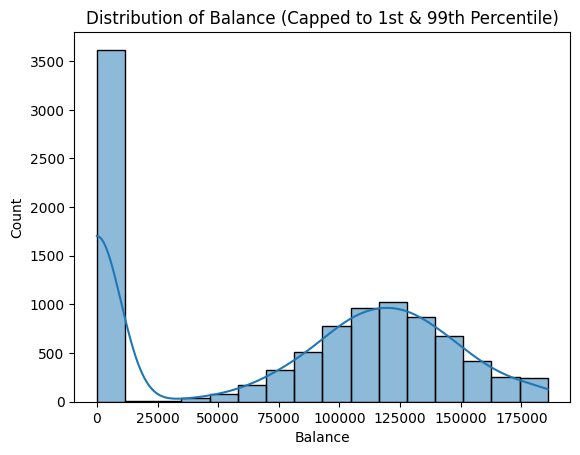

Univariable Analysis for Numerical Variable: NumOfProducts
Mean: 1.5302
Median: 1.0
Mode: [1]
Standard Deviation: 0.5816543579989906
Minimum: 1
Maximum: 4
25%: 1.0
50%: 1.0
75%: 2.0
Range: 3
IQR: 1.0
Variance: 0.33832179217921793
COV: 38.01165586191286
Skewness: 0.7455678882823168
Null Check: 0


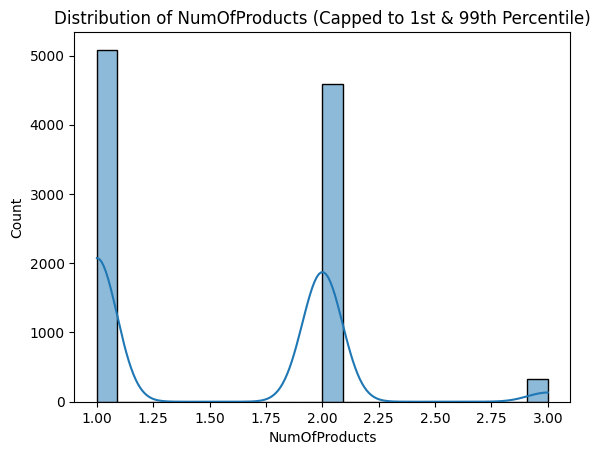

Univariable Analysis for Numerical Variable: EstimatedSalary
Mean: 100090.239881
Median: 100193.915
Mode: [24924.92]
Standard Deviation: 57510.49281769816
Minimum: 11.58
Maximum: 199992.48
25%: 51002.11
50%: 100193.915
75%: 149388.2475
Range: 199980.90000000002
IQR: 98386.1375
Variance: 3307456784.134512
COV: 57.45864220734603
Skewness: 0.0020853576615585162
Null Check: 0


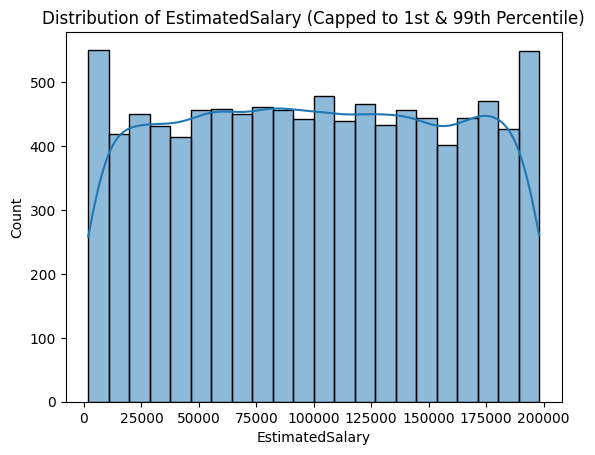

Univariable Analysis for Numerical Variable: Point Earned
Mean: 606.5151
Median: 605.0
Mode: [408]
Standard Deviation: 225.9248392171333
Minimum: 119
Maximum: 1000
25%: 410.0
50%: 605.0
75%: 801.0
Range: 881
IQR: 391.0
Variance: 51042.03297528753
COV: 37.249664388756905
Skewness: 0.008344112982275689
Null Check: 0


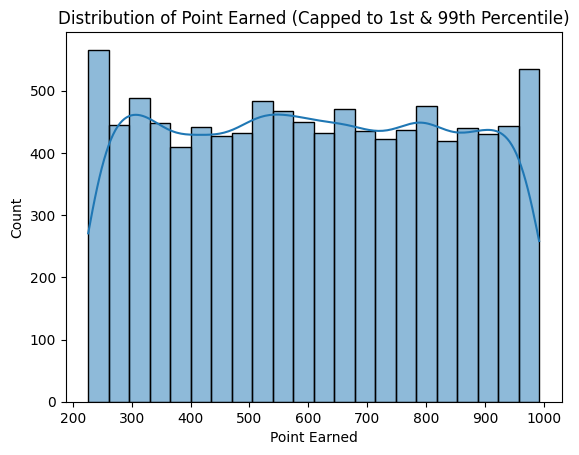

In [14]:
for col in Numerical_Variables:
    df_cleaned[col] = Numerical_Analysis(df_cleaned[col])

Univariable Analysis for Categorical Variable:  Geography
Count of Categories:  Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Percentage of each Category:  Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64


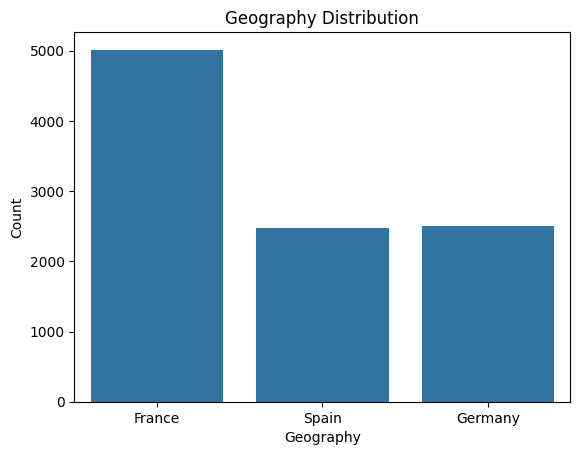

Univariable Analysis for Categorical Variable:  Gender
Count of Categories:  Gender
Male      5457
Female    4543
Name: count, dtype: int64
Percentage of each Category:  Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64


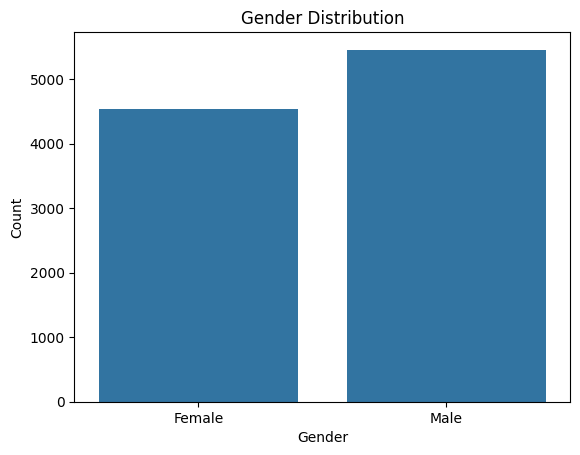

Univariable Analysis for Categorical Variable:  HasCrCard
Count of Categories:  HasCrCard
1    7055
0    2945
Name: count, dtype: int64
Percentage of each Category:  HasCrCard
1    70.55
0    29.45
Name: proportion, dtype: float64


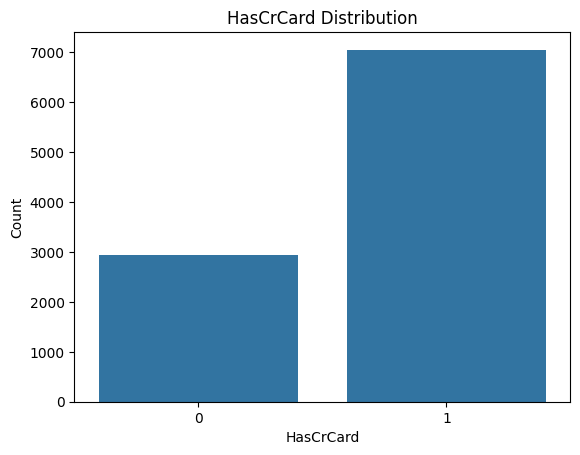

Univariable Analysis for Categorical Variable:  IsActiveMember
Count of Categories:  IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
Percentage of each Category:  IsActiveMember
1    51.51
0    48.49
Name: proportion, dtype: float64


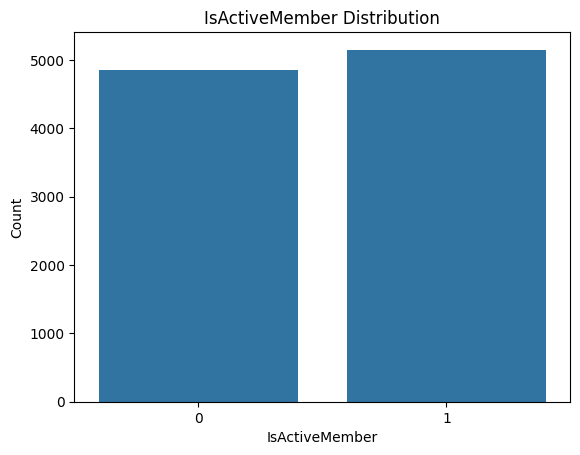

Univariable Analysis for Categorical Variable:  Complain
Count of Categories:  Complain
0    7956
1    2044
Name: count, dtype: int64
Percentage of each Category:  Complain
0    79.56
1    20.44
Name: proportion, dtype: float64


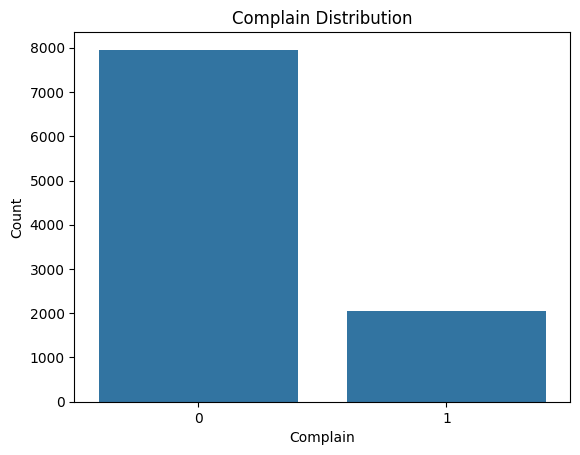

Univariable Analysis for Categorical Variable:  Satisfaction Score
Count of Categories:  Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64
Percentage of each Category:  Satisfaction Score
3    20.42
2    20.14
4    20.08
5    20.04
1    19.32
Name: proportion, dtype: float64


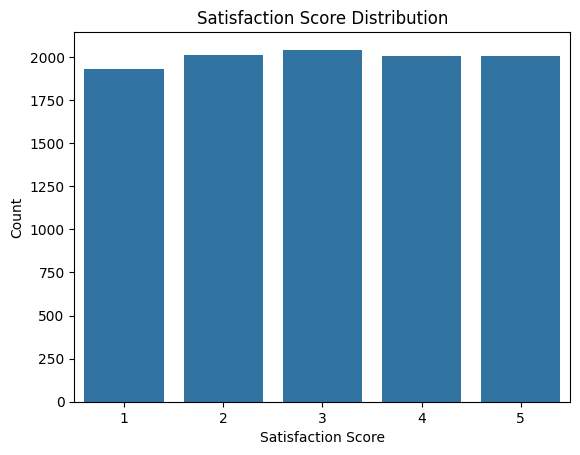

Univariable Analysis for Categorical Variable:  Card Type
Count of Categories:  Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64
Percentage of each Category:  Card Type
DIAMOND     25.07
GOLD        25.02
SILVER      24.96
PLATINUM    24.95
Name: proportion, dtype: float64


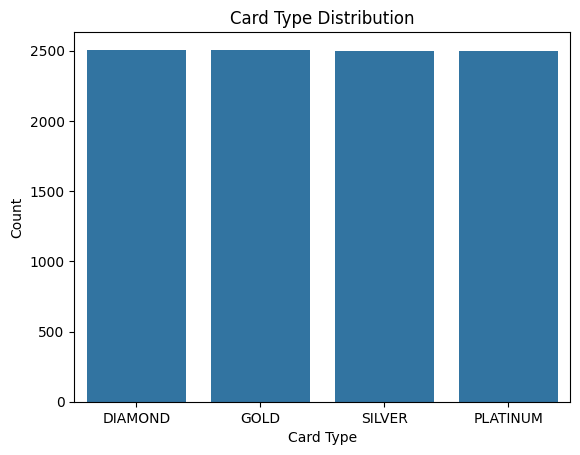

In [15]:
for col in Categorical_Variables:
    Categorical_Analysis(df_cleaned[col])

In [16]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Geography', 'Card Type'], drop_first=True)


In [17]:
for col in Categorical_Variables:
    print(col)

Geography
Gender
HasCrCard
IsActiveMember
Complain
Satisfaction Score
Card Type


In [18]:
for col in Numerical_Variables:
    print(col)

CreditScore
Age
Tenure
Balance
NumOfProducts
EstimatedSalary
Point Earned


In [19]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [20]:
df_cleaned.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [21]:
df_encoded.head()


,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,...,101348.88,1,1,2,464,False,False,False,False,False
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,...,112542.58,0,1,3,456,False,True,False,False,False
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,...,113931.57,1,1,3,377,False,False,False,False,False
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,...,93826.63,0,0,5,350,False,False,True,False,False
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,...,79084.10,0,0,5,425,False,True,True,False,False


In [22]:
df_encoded.tail()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
9995,9996,15606229,Obijiaku,771,Male,39,5,0.00,2,1,...,96270.64,0,0,1,300,False,False,False,False,False
9996,9997,15569892,Johnstone,516,Male,35,10,57369.61,1,1,...,101699.77,0,0,5,771,False,False,False,True,False
9997,9998,15584532,Liu,709,Female,36,7,0.00,1,0,...,42085.58,1,1,3,564,False,False,False,False,True
9998,9999,15682355,Sabbatini,772,Male,42,3,75075.31,2,1,...,92888.52,1,1,2,339,True,False,True,False,False
9999,10000,15628319,Walker,792,Female,28,4,130142.79,1,1,...,38190.78,0,0,3,911,False,False,False,False,False


In [23]:
#convertinf the false/true to 0/1 format
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes(include='bool').columns})


In [24]:
df_encoded.head()


,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,...,101348.88,1,1,2,464,0,0,0,0,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,...,112542.58,0,1,3,456,0,1,0,0,0
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,...,113931.57,1,1,3,377,0,0,0,0,0
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,...,93826.63,0,0,5,350,0,0,1,0,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,...,79084.10,0,0,5,425,0,1,1,0,0


In [25]:
for col in df_encoded.columns:
    print(col)

RowNumber
CustomerId
Surname
CreditScore
Gender
Age
Tenure
Balance
NumOfProducts
HasCrCard
IsActiveMember
EstimatedSalary
Exited
Complain
Satisfaction Score
Point Earned
Geography_Germany
Geography_Spain
Card Type_GOLD
Card Type_PLATINUM
Card Type_SILVER


In [26]:
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})


In [27]:
df_encoded.tail()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,...,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
9995,9996,15606229,Obijiaku,771,0,39,5,0.00,2,1,...,96270.64,0,0,1,300,0,0,0,0,0
9996,9997,15569892,Johnstone,516,0,35,10,57369.61,1,1,...,101699.77,0,0,5,771,0,0,0,1,0
9997,9998,15584532,Liu,709,1,36,7,0.00,1,0,...,42085.58,1,1,3,564,0,0,0,0,1
9998,9999,15682355,Sabbatini,772,0,42,3,75075.31,2,1,...,92888.52,1,1,2,339,1,0,1,0,0
9999,10000,15628319,Walker,792,1,28,4,130142.79,1,1,...,38190.78,0,0,3,911,0,0,0,0,0


In [28]:
#updating the categoical variables as we changed for encoding
Categorical_Variables=df_encoded[['Geography_Germany','Geography_Spain','Gender','HasCrCard','IsActiveMember','Complain','Satisfaction Score','Card Type_GOLD','Card Type_PLATINUM','Card Type_SILVER']]

In [29]:
for col in Categorical_Variables:
    pd.crosstab(df_encoded[col], df_encoded['Exited'], normalize='index') * 100


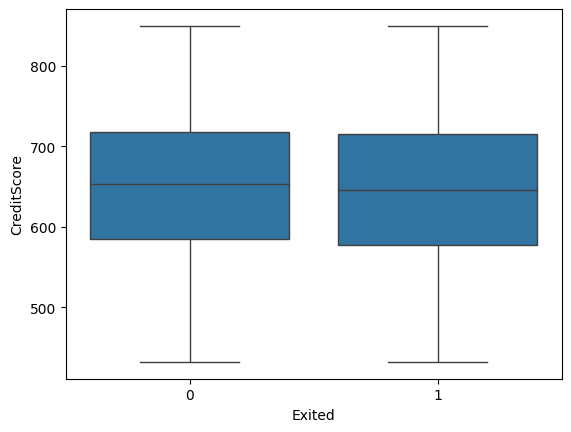

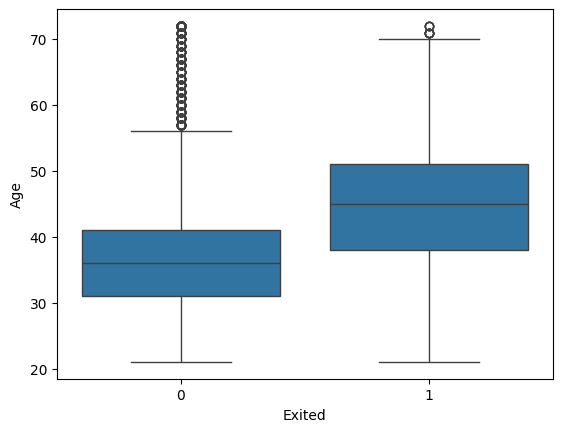

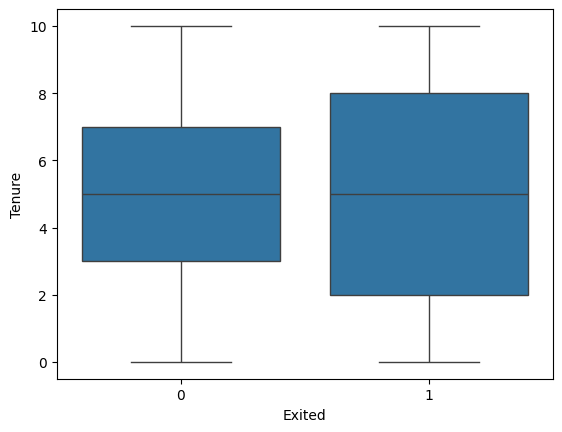

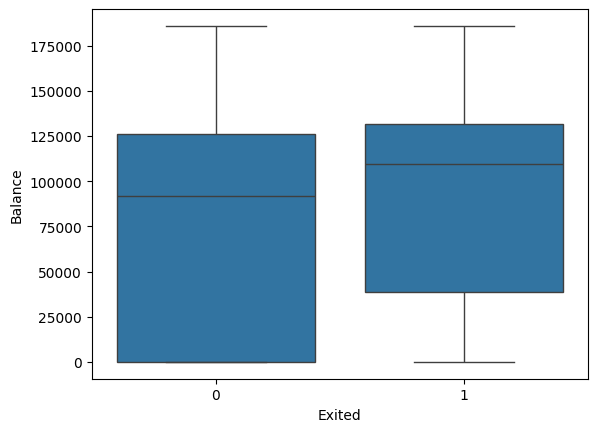

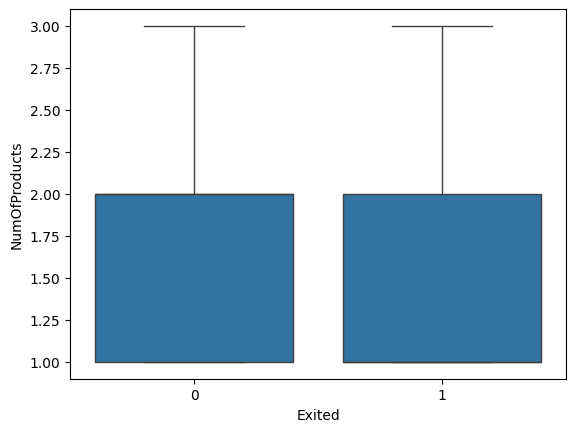

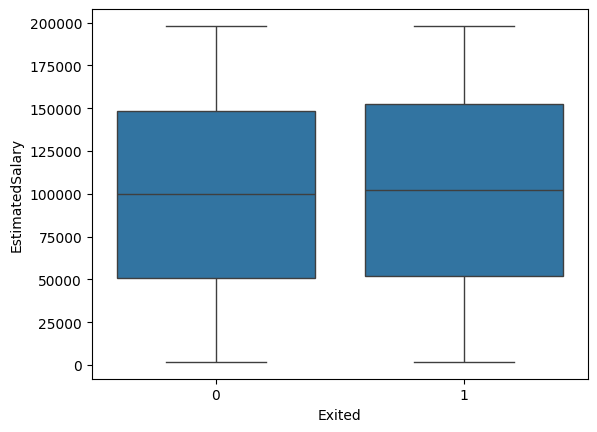

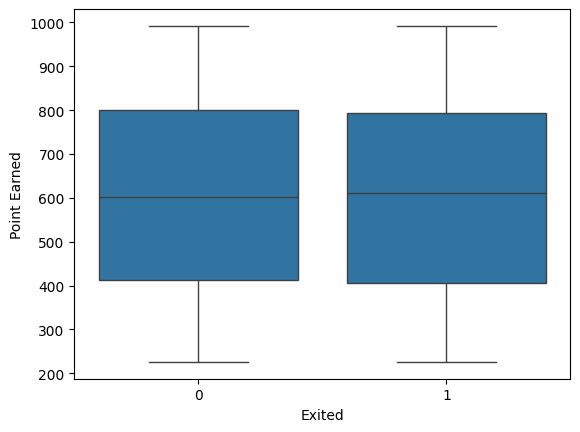

In [30]:
for col in Numerical_Variables:
    sns.boxplot(x='Exited', y=df_encoded[col], data=df_encoded)
    plt.show()

In [31]:
credit_bins = [0, 400, 500, 600, 700, 800, 1000]
credit_labels = ['<400', '400-500', '500-600', '600-700', '700-800', '800<']

age_bins = [15, 25, 35, 45, 55, 65, 100]
age_labels = ['<25', '25-35', '35-45', '45-55', '55-65', '65+']

tenure_bins = [-1, 2, 4, 6, 8, 11]
tenure_labels = ['0-2', '3-4', '5-6', '7-8', '9-10']

balance_bins = [-1, 1, 50000, 100000, 150000, 200000, 300000]
balance_labels = ['0', '1-50K', '50K-100K', '100K-150K', '150K-200K', '200K+']

product_bins = [0, 1, 2, 3, 5]
product_labels = ['1', '2', '3', '4+']

salary_bins = [0, 20000, 40000, 60000, 80000, 100000, 200000]
salary_labels = ['<20K', '20K-40K', '40K-60K', '60K-80K', '80K-100K', '100K+']

points_bins = [100, 250, 400, 550, 700, 850, 1100]
points_labels = ['100-250', '250-400', '400-550', '550-700', '700-850', '850+']


In [32]:
def plot_churn_distribution(df, column, bins, labels):
    bin_col = f"{column}_Binned"
    df[bin_col] = pd.cut(df[column], bins=bins, labels=labels)

    churn_rate = df.groupby(bin_col, observed=True)['Exited'].mean() * 100
    churn_count = df.groupby(bin_col, observed=True)['Exited'].sum()

    fig, ax1 = plt.subplots(figsize=(10, 6))
    bars = ax1.bar(churn_rate.index, churn_rate.values, color='skyblue', alpha=0.7, label='Churn Rate (%)')
    ax1.set_xlabel(f'{column} Bins')
    ax1.set_ylabel('Churn Rate (%)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    ax2 = ax1.twinx()
    ax2.plot(churn_count.index, churn_count.values, color='red', marker='o', linewidth=2, 
             markersize=8, label='Churn Count')
    ax2.set_ylabel('Churn Count', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    for x, y in zip(churn_count.index, churn_count.values):
        ax2.text(x, y + 0.1, str(int(y)), color='red', ha='center', va='bottom', fontweight='bold')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.title(f'Churn Rate & Count by {column} Bins')
    plt.tight_layout()
    plt.show()

    print("Churn Rate:\n", churn_rate)
    print("\nChurn Count:\n", churn_count)


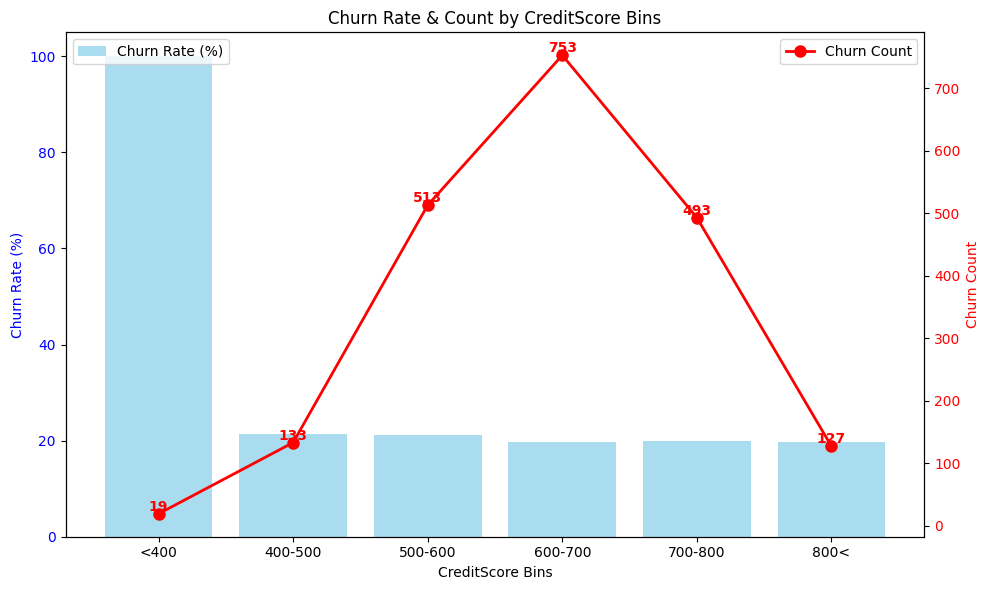

Churn Rate:
 CreditScore_Binned
<400       100.000000
400-500     21.314103
500-600     21.172101
600-700     19.722368
700-800     19.951437
800<        19.689922
Name: Exited, dtype: float64

Churn Count:
 CreditScore_Binned
<400        19
400-500    133
500-600    513
600-700    753
700-800    493
800<       127
Name: Exited, dtype: int64


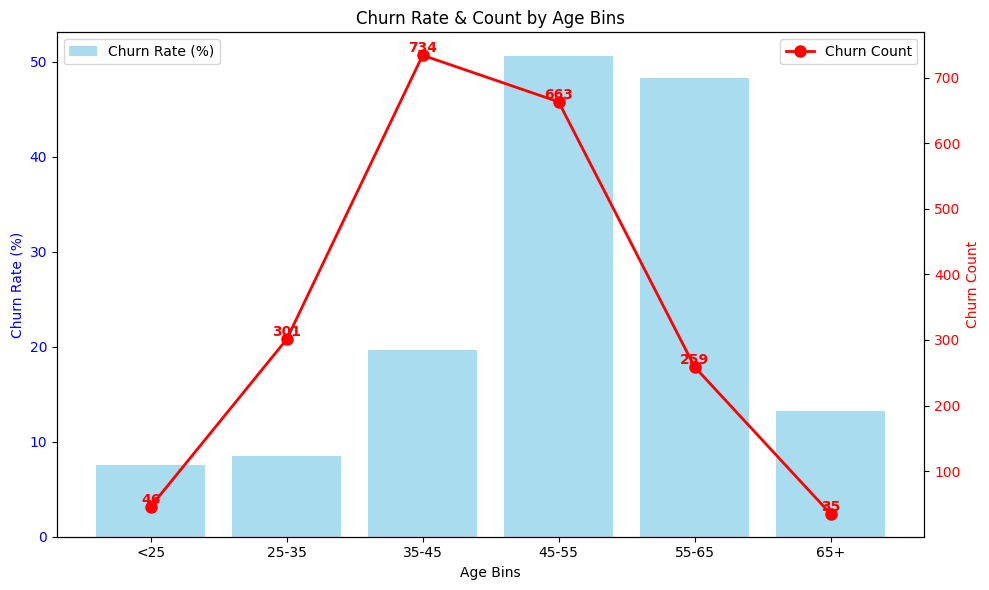

Churn Rate:
 Age_Binned
<25       7.528642
25-35     8.498024
35-45    19.646681
45-55    50.572082
55-65    48.320896
65+      13.257576
Name: Exited, dtype: float64

Churn Count:
 Age_Binned
<25       46
25-35    301
35-45    734
45-55    663
55-65    259
65+       35
Name: Exited, dtype: int64


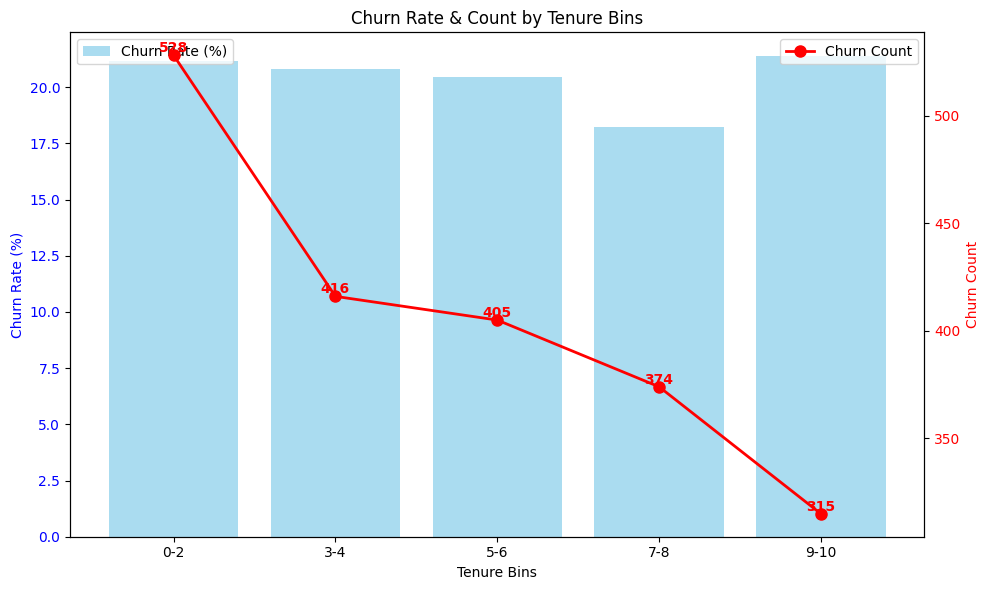

Churn Rate:
 Tenure_Binned
0-2     21.153846
3-4     20.820821
5-6     20.464881
7-8     18.217243
9-10    21.370421
Name: Exited, dtype: float64

Churn Count:
 Tenure_Binned
0-2     528
3-4     416
5-6     405
7-8     374
9-10    315
Name: Exited, dtype: int64


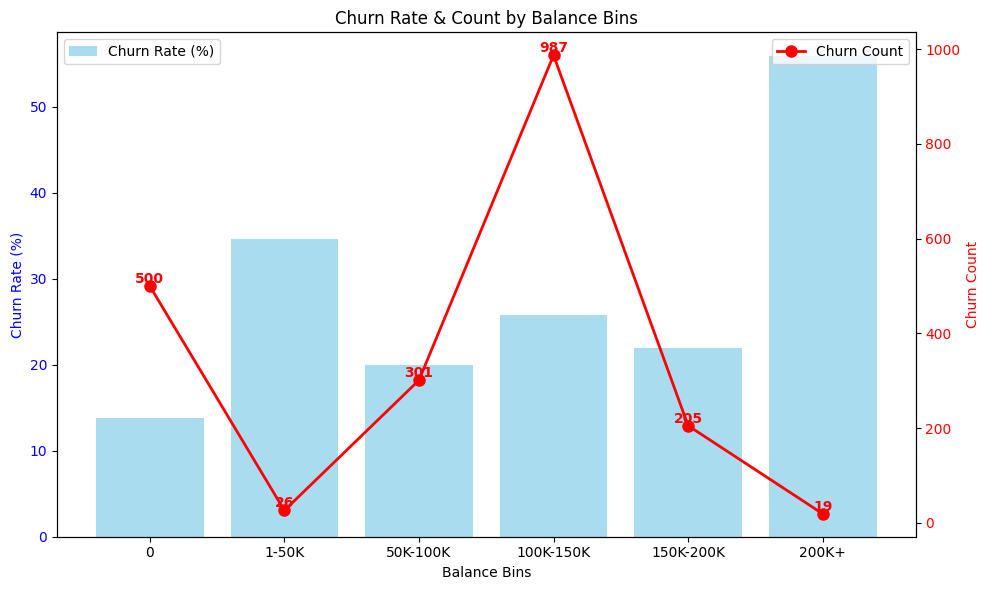

Churn Rate:
 Balance_Binned
0            13.823611
1-50K        34.666667
50K-100K     19.946985
100K-150K    25.770235
150K-200K    21.925134
200K+        55.882353
Name: Exited, dtype: float64

Churn Count:
 Balance_Binned
0            500
1-50K         26
50K-100K     301
100K-150K    987
150K-200K    205
200K+         19
Name: Exited, dtype: int64


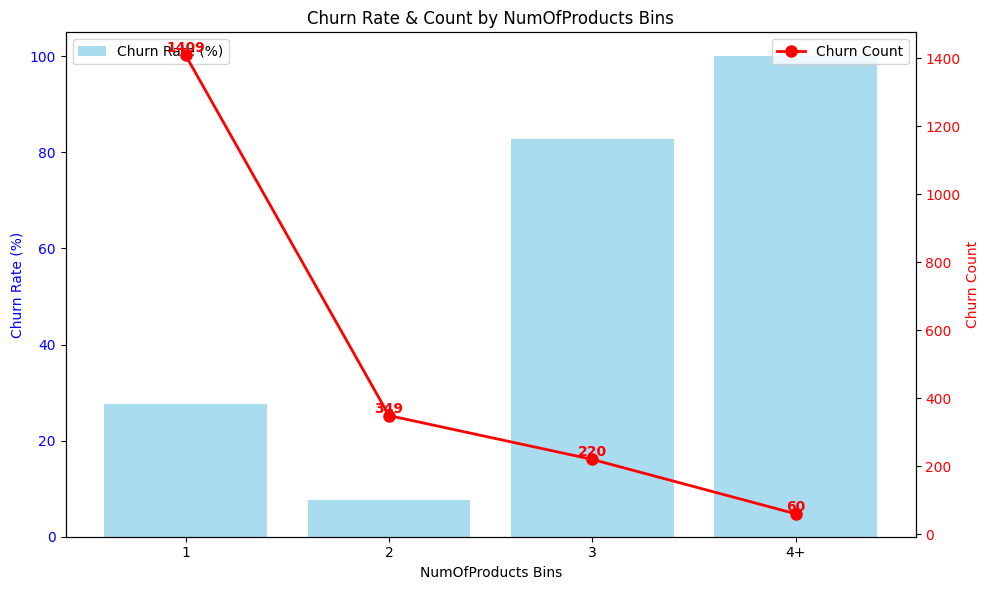

Churn Rate:
 NumOfProducts_Binned
1      27.714398
2       7.603486
3      82.706767
4+    100.000000
Name: Exited, dtype: float64

Churn Count:
 NumOfProducts_Binned
1     1409
2      349
3      220
4+      60
Name: Exited, dtype: int64


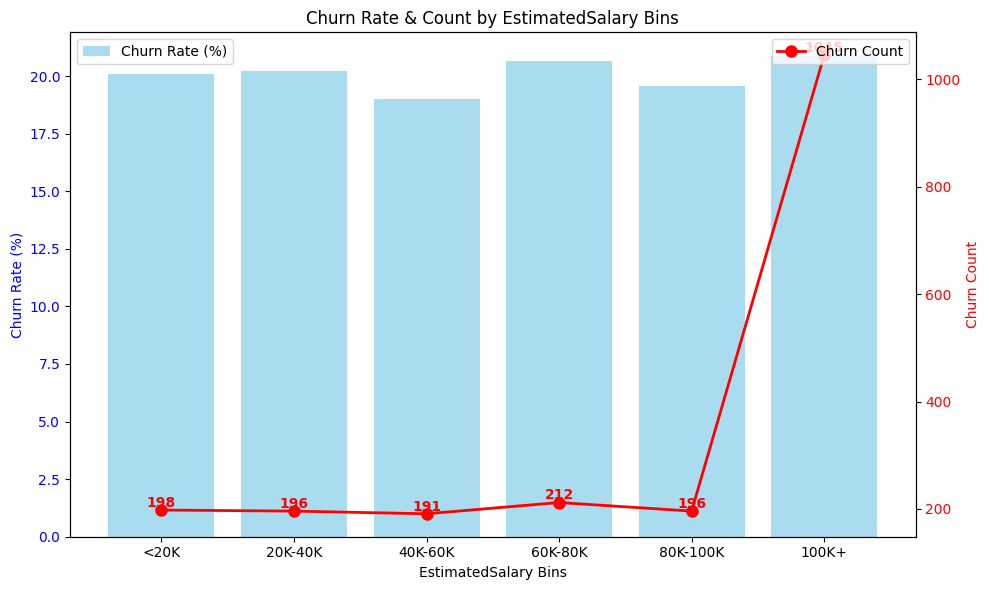

Churn Rate:
 EstimatedSalary_Binned
<20K        20.081136
20K-40K     20.227038
40K-60K     18.986083
60K-80K     20.642648
80K-100K    19.560878
100K+       20.858283
Name: Exited, dtype: float64

Churn Count:
 EstimatedSalary_Binned
<20K         198
20K-40K      196
40K-60K      191
60K-80K      212
80K-100K     196
100K+       1045
Name: Exited, dtype: int64


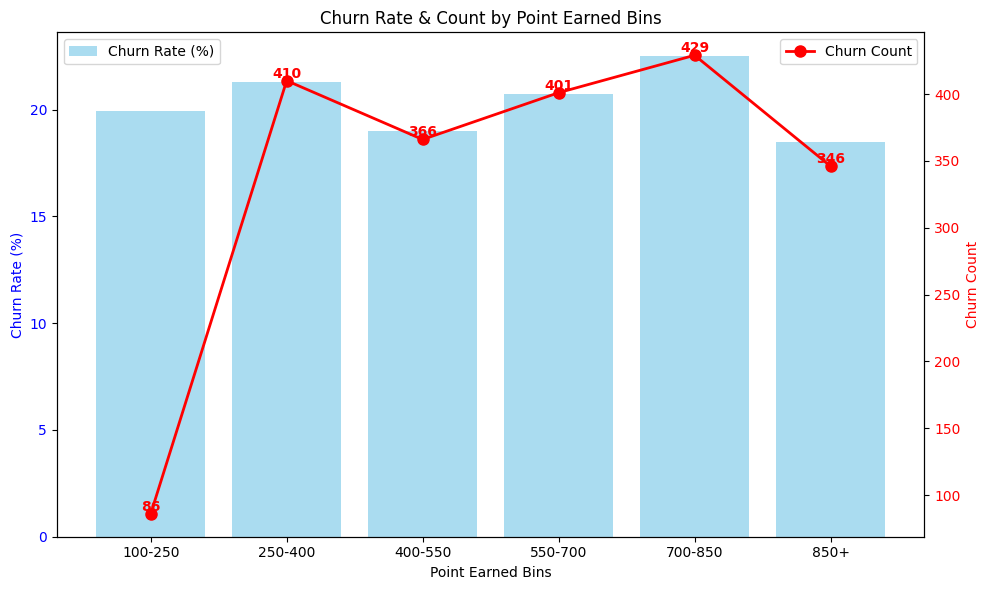

Churn Rate:
 Point Earned_Binned
100-250    19.953596
250-400    21.287643
400-550    18.983402
550-700    20.723514
700-850    22.496067
850+       18.473038
Name: Exited, dtype: float64

Churn Count:
 Point Earned_Binned
100-250     86
250-400    410
400-550    366
550-700    401
700-850    429
850+       346
Name: Exited, dtype: int64


In [33]:
plot_churn_distribution(df, 'CreditScore', credit_bins,credit_labels)
plot_churn_distribution(df, 'Age', age_bins,age_labels)
plot_churn_distribution(df, 'Tenure', tenure_bins,tenure_labels)
plot_churn_distribution(df, 'Balance', balance_bins,balance_labels)
plot_churn_distribution(df, 'NumOfProducts', product_bins,product_labels)
plot_churn_distribution(df, 'EstimatedSalary', salary_bins,salary_labels)
plot_churn_distribution(df, 'Point Earned', points_bins,points_labels)

In [34]:
comparison = pd.DataFrame({
    'Original': df['Age'],
    'Capped': df_encoded['Age'],
})


comparison['Changed'] = comparison['Original'] != comparison['Capped']
print("Values that were capped:")
print(comparison[comparison['Changed']])


Values that were capped:
      Original  Capped  Changed
57          19      21     True
85          75      72     True
158         73      72     True
233         20      21     True
252         79      72     True
...        ...     ...      ...
9782        18      21     True
9894        77      72     True
9932        18      21     True
9936        77      72     True
9940        20      21     True

[174 rows x 3 columns]


In [35]:
corr_matrix=df_encoded.corr(numeric_only=True)
corr_matrix

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
RowNumber,1.000000,0.004202,0.005700,-0.018196,0.000732,-0.006495,-0.009061,0.006867,0.000599,0.012044,-0.005969,-0.016140,-0.016957,0.009289,0.002200,-0.000044,-0.009905,-0.003171,0.017031,-0.013555
CustomerId,0.004202,1.000000,0.005543,0.002641,0.008915,-0.014883,-0.012382,0.019728,-0.014025,0.001665,0.015235,-0.006203,-0.007293,-0.000865,-0.013088,-0.003097,0.007800,0.012263,-0.003501,-0.006068
CreditScore,0.005700,0.005543,1.000000,0.003040,-0.003640,0.000483,0.006627,0.012111,-0.005196,0.025259,-0.000818,-0.024194,-0.024478,-0.013039,0.000062,0.005662,0.004992,0.011061,-0.013889,-0.000317
Gender,-0.018196,0.002641,0.003040,1.000000,0.027536,-0.014733,-0.011999,0.018820,-0.005766,-0.022544,0.008098,0.106267,0.106287,-0.000242,0.013253,0.024628,-0.016889,-0.034619,0.013238,0.010241
Age,0.000732,0.008915,-0.003640,0.027536,1.000000,-0.010573,0.029619,-0.039395,-0.011689,0.083831,-0.007616,0.291137,0.289343,-0.000792,0.002441,0.047854,-0.001221,0.001124,0.004940,-0.009731
Tenure,-0.006495,-0.014883,0.000483,-0.014733,-0.010573,1.000000,-0.012167,0.012878,0.022583,-0.028362,0.007829,-0.013656,-0.013047,0.008663,-0.010151,-0.000567,0.003868,0.012292,-0.018773,0.007195
Balance,-0.009061,-0.012382,0.006627,-0.011999,0.029619,-0.012167,1.000000,-0.319100,-0.014244,-0.010073,0.012561,0.117635,0.118297,-0.002384,0.014387,0.402960,-0.135868,0.002044,-0.007266,-0.019314
NumOfProducts,0.006867,0.019728,0.012111,0.018820,-0.039395,0.012878,-0.319100,1.000000,0.003821,0.010647,0.013878,-0.070513,-0.069173,-0.010188,-0.014356,-0.014483,0.012620,-0.010105,0.021062,0.008485
HasCrCard,0.000599,-0.014025,-0.005196,-0.005766,-0.011689,0.022583,-0.014244,0.003821,1.000000,-0.011866,-0.009950,-0.006976,-0.007095,-0.000212,-0.010968,0.010577,-0.013480,-0.013251,0.001915,0.008147
IsActiveMember,0.012044,0.001665,0.025259,-0.022544,0.083831,-0.028362,-0.010073,0.010647,-0.011866,1.000000,-0.011420,-0.156356,-0.154741,0.010236,-0.005071,-0.020486,0.016732,0.011189,0.004081,0.007541


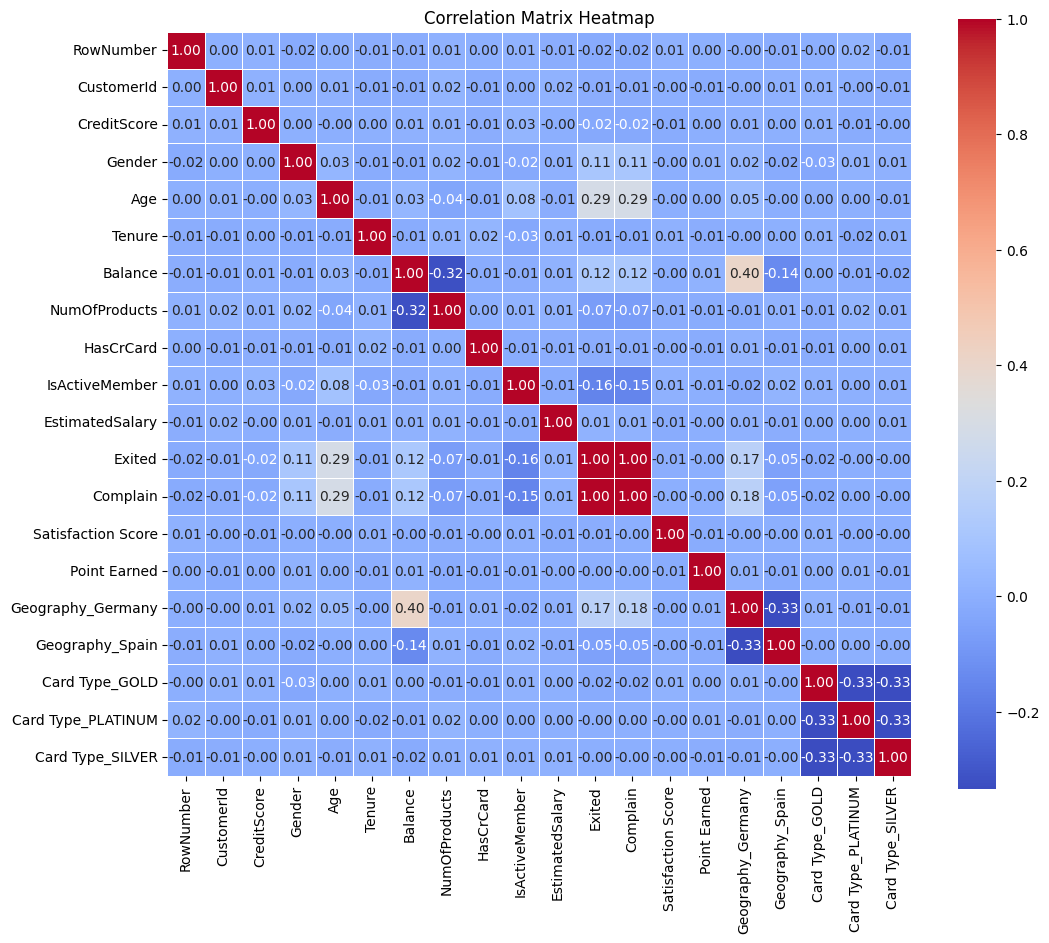

In [36]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, feature_list):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = feature_list
    vif_data["VIF"] = [variance_inflation_factor(df[feature_list].values, i) 
                       for i in range(len(feature_list))]
    return vif_data.sort_values('VIF', ascending=False)

num_features=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Point Earned']
vif_results = calculate_vif(df_encoded, num_features)
print(vif_results)

num1_features=['Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Point Earned']
vif1_results=calculate_vif(df_encoded,num1_features)
print('\n',vif1_results)


           Feature        VIF
0      CreditScore  22.358928
1              Age  12.587040
4    NumOfProducts   8.189729
6     Point Earned   7.521463
5  EstimatedSalary   3.901856
2           Tenure   3.861975
3          Balance   2.664070

            Feature       VIF
0              Age  9.731713
3    NumOfProducts  6.763932
5     Point Earned  6.753143
4  EstimatedSalary  3.758408
1           Tenure  3.702858
2          Balance  2.498117


In [38]:
#As after dropping CreditScore, VIF of Age drops to below 10 (moderate), so we will proceed to ml without CreditScore to ensure better accuracy
ml_numerical_features=['Age','Tenure','Balance','NumOfProducts','EstimatedSalary','Point Earned']
ml_categorical_features=[
    'Geography_Germany', 'Geography_Spain', 'Gender', 'HasCrCard', 
    'IsActiveMember', 'Satisfaction Score', 
    'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER']

final_features=ml_numerical_features+ml_categorical_features

print("Final Features going into Feature Scaling and then Modeling: \n",final_features)
print("Total Features: ",len(final_features))
#the other 3 models are using 18 features, so we are going to retrain using 18 feautres insteaf of the 15 final features after VIF




Final Features going into Feature Scaling and then Modeling: 
 ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'Geography_Germany', 'Geography_Spain', 'Gender', 'HasCrCard', 'IsActiveMember', 'Satisfaction Score', 'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER']
Total Features:  15


In [39]:
#Feature Scaling using StandardScaler

from sklearn.preprocessing import StandardScaler
import joblib

X = df_encoded[final_features]
y = df_encoded['Exited']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler,"scaler.pkl")
X_scaled_df = pd.DataFrame(X_scaled, columns=final_features)
                           
print(f"Scaled data shape: {X_scaled_df.shape}")


Scaled data shape: (10000, 15)


In [40]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")  
print(f"Training Target: {y_train.shape}")
print(f"Training set: {y_test.shape}")


Training set: (8000, 15)
Test set: (2000, 15)
Training Target: (8000,)
Training set: (2000,)


In [41]:
#Training the model
#First with
##Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000,random_state=42, class_weight='balanced')
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

Accuracy: 0.7215
ROC AUC Score: 0.7831

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.39      0.73      0.51       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.72      0.75      2000



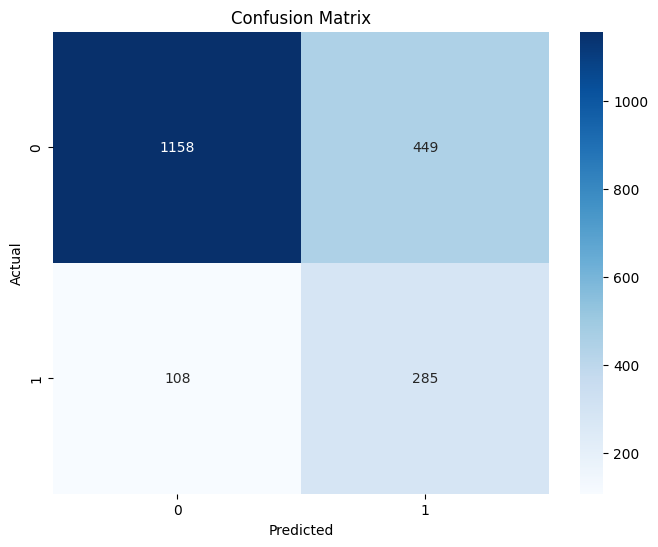

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [44]:
print(df_encoded['Exited'].value_counts(normalize=True))


Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64


In [45]:
##RandomForest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
'from imblearn.over_sampling import SMOTE'

'smote = SMOTE(random_state=42)'

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', {0:1, 1:2}, {0:1, 1:3}]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_



Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split


X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']
X=X.drop(['Surname'],axis=1)
X=X.drop(['Complain'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

'X_resampled, y_resampled = smote.fit_resample(X_train, y_train)'

best_rf = RandomForestClassifier(class_weight='balanced', max_depth=10, max_features='sqrt',min_samples_leaf=2, min_samples_split=2, n_estimators=100, random_state=42)

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.844
ROC AUC Score: 0.8698193787565278

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      1592
           1       0.61      0.67      0.64       408

    accuracy                           0.84      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.85      0.84      0.85      2000


Confusion Matrix:
 [[1416  176]
 [ 136  272]]


In [48]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [1, 2, 3] 
}

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_xgb = grid.best_estimator_


Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 3, 'subsample': 1}


In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

xgb_best = XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=100,
    colsample_bytree=1,
    subsample=1,
    scale_pos_weight=3,
    eval_metric='logloss',
    random_state=42
)
xgb_best.fit(X_train, y_train)

y_pred = xgb_best.predict(X_test)
y_proba = xgb_best.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.829
ROC AUC Score: 0.8758275137944626

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89      1592
           1       0.56      0.71      0.63       408

    accuracy                           0.83      2000
   macro avg       0.74      0.79      0.76      2000
weighted avg       0.85      0.83      0.84      2000


Confusion Matrix:
 [[1368  224]
 [ 118  290]]


In [50]:
import joblib

joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(best_rf, 'random_forest_tuned.pkl')
joblib.dump(xgb_best, 'xgboost_tuned.pkl')




['xgboost_tuned.pkl']

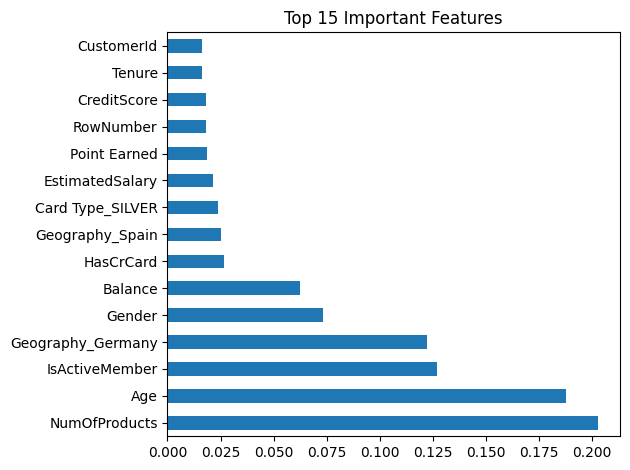

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

feat_imp = pd.Series(xgb_best.feature_importances_, index=X.columns)
feat_imp.nlargest(15).plot(kind='barh')
plt.title("Top 15 Important Features")
plt.tight_layout()
plt.show()


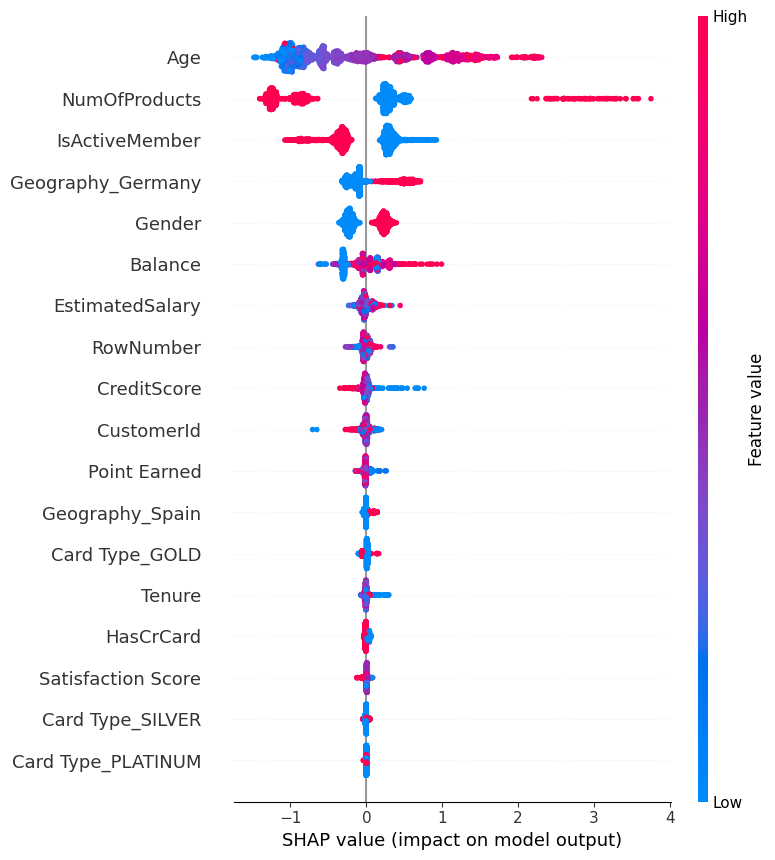

In [52]:
import shap
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


In [53]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

base_learners = [
    ('lr', LogisticRegression(max_iter=10000)),
    ('rf', RandomForestClassifier(n_estimators=100, class_weight='balanced')),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=3))
]

meta_learner = LogisticRegression(class_weight='balanced')

stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=StratifiedKFold(n_splits=5)
)


stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

y_proba = stacked_model.predict_proba(X_test)[:, 1]

print("Accuracy:", stacked_model.score(X_test, y_test))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

joblib.dump(stacked_model, 'stacked_model.pkl')


c:\Users\vsriv\OneDrive\Desktop\Churn EDA\churn-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:09:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\vsriv\OneDrive\Desktop\Churn EDA\churn-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:09:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\vsriv\OneDrive\Desktop\Churn EDA\churn-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:09:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\vsriv\OneDrive\Desktop\Churn EDA\churn-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:09:30] WARNING: C:\actions-runner\_w

Accuracy: 0.8235
ROC AUC Score: 0.8639859838407725
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88      1592
           1       0.55      0.73      0.63       408

    accuracy                           0.82      2000
   macro avg       0.74      0.79      0.76      2000
weighted avg       0.85      0.82      0.83      2000



['stacked_model.pkl']

In [54]:
import pandas as pd
from tabulate import tabulate


model_metrics = [
    {
        'Model': 'Logistic Regression',
        'Accuracy': 0.8150,
        'ROC AUC': 0.7801,
        'Class 1 Precision': 0.58,
        'Class 1 Recall': 0.21,
        'Class 1 F1-score': 0.31
    },
    {
        'Model': 'Random Forest (Tuned)',
        'Accuracy': 0.844,
        'ROC AUC': 0.8698,
        'Class 1 Precision': 0.61,
        'Class 1 Recall': 0.67,
        'Class 1 F1-score': 0.64
    },
    {
        'Model': 'XGBoost (Tuned)',
        'Accuracy': 0.829,
        'ROC AUC': 0.8758,
        'Class 1 Precision': 0.56,
        'Class 1 Recall': 0.71,
        'Class 1 F1-score': 0.63
    },
    {
        'Model': 'Stacked Ensemble (all 3)',
        'Accuracy': 0.835,
        'ROC AUC': 0.8646,
        'Class 1 Precision': 0.58,
        'Class 1 Recall': 0.73,
        'Class 1 F1-score': 0.64
    }
]

summary_df = pd.DataFrame(model_metrics)
print(tabulate(summary_df, headers='keys', tablefmt='fancy_grid'))


╒════╤══════════════════════════╤════════════╤═══════════╤═════════════════════╤══════════════════╤════════════════════╕
│    │ Model                    │   Accuracy │   ROC AUC │   Class 1 Precision │   Class 1 Recall │   Class 1 F1-score │
╞════╪══════════════════════════╪════════════╪═══════════╪═════════════════════╪══════════════════╪════════════════════╡
│  0 │ Logistic Regression      │      0.815 │    0.7801 │                0.58 │             0.21 │               0.31 │
├────┼──────────────────────────┼────────────┼───────────┼─────────────────────┼──────────────────┼────────────────────┤
│  1 │ Random Forest (Tuned)    │      0.844 │    0.8698 │                0.61 │             0.67 │               0.64 │
├────┼──────────────────────────┼────────────┼───────────┼─────────────────────┼──────────────────┼────────────────────┤
│  2 │ XGBoost (Tuned)          │      0.829 │    0.8758 │                0.56 │             0.71 │               0.63 │
├────┼──────────────────────────

In [ ]:
import joblib
import numpy as np

feature_order = [
    'RowNumber', 'CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure',
    'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
    'EstimatedSalary', 'Satisfaction Score', 'Point Earned',
    'Geography_Germany', 'Geography_Spain',
    'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'
]

print("Choose model:")
print("1 → Logistic Regression")
print("2 → Random Forest")
print("3 → XGBoost")
print("4 → Stacked Model")
model_choice = input("Enter your choice (1-4): ")

model_paths = {
    "1": "logistic_regression_model.pkl",
    "2": "random_forest_tuned.pkl",
    "3": "xgboost_tuned.pkl",
    "4": "stacked_model.pkl"
}

if model_choice not in model_paths:
    print("Invalid choice.")
    exit()

model = joblib.load(model_paths[model_choice])
print("Model loaded successfully.")

print("\nPlease enter the following details:")

RowNumber = int(input("Row Number: "))
CustomerId = int(input("Customer ID: "))
CreditScore = int(input("Credit Score: "))
Gender = input("Gender (M/F): ").strip().upper()
Gender = 1 if Gender == "M" else 0

Age = int(input("Age: "))
Tenure = int(input("Tenure: "))
Balance = float(input("Balance: "))
NumOfProducts = int(input("Number of Products: "))
HasCrCard = int(input("Has Credit Card? (0/1): "))
IsActiveMember = int(input("Is Active Member? (0/1): "))
EstimatedSalary = float(input("Estimated Salary: "))
Satisfaction = int(input("Satisfaction Score (1-5): "))
Points = int(input("Points Earned: "))

Geography = input("Geography (Germany/Spain/France): ").strip().lower()
Geo_Germany = 1 if Geography == "germany" else 0
Geo_Spain = 1 if Geography == "spain" else 0


CardType = input("Card Type (Gold/Platinum/Silver/Diamond): ").strip().lower()
Card_Gold = 1 if CardType == "gold" else 0
Card_Platinum = 1 if CardType == "platinum" else 0
Card_Silver = 1 if CardType == "silver" else 0


input_data = np.array([[
    RowNumber, CustomerId, CreditScore, Gender, Age, Tenure, Balance,
    NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary,
    Satisfaction, Points, Geo_Germany, Geo_Spain,
    Card_Gold, Card_Platinum, Card_Silver
]])

prediction = model.predict(input_data)[0]
result = "Customer will churn" if prediction == 1 else "Customer will NOT churn"
print(f"\nPrediction: {result}")


Choose model:
1 → Logistic Regression
2 → Random Forest
3 → XGBoost
4 → Stacked Model
Invalid choice.


KeyError: ''

: 

In [1]:
import joblib
mod=joblib.load('xgboost_tuned.pkl')
print("Features used in stacked model:")
print(mod.feature_names_in_)

log=joblib.load('logistic_regression_model.pkl')
print("features in logistc regression")
print(log.n_features_in_)


Features used in stacked model:
['RowNumber' 'CustomerId' 'CreditScore' 'Gender' 'Age' 'Tenure' 'Balance'
 'NumOfProducts' 'HasCrCard' 'IsActiveMember' 'EstimatedSalary'
 'Satisfaction Score' 'Point Earned' 'Geography_Germany' 'Geography_Spain'
 'Card Type_GOLD' 'Card Type_PLATINUM' 'Card Type_SILVER']
features in logistc regression
15


In [ ]:
#logistc is not using rownumber, customerid, creditscore

['Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'Geography_Germany', 'Geography_Spain', 'Gender', 'HasCrCard', 'IsActiveMember', 'Satisfaction Score', 'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER']

['Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary',
 'Point Earned',
 'Geography_Germany',
 'Geography_Spain',
 'Gender',
 'HasCrCard',
 'IsActiveMember',
 'Satisfaction Score',
 'Card Type_GOLD',
 'Card Type_PLATINUM',
 'Card Type_SILVER']